In [216]:
import xarray as xr
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot 
import xarray_class_accessors as xca
import matplotlib.pyplot as plt
import warnings
import cftime
from importlib import reload
import xarray_class_accessors as xca
import matplotlib.ticker as mticker

# Custom plots for signal to noise functions.
import sn_plotting as sn_plot
from dask.diagnostics import ProgressBar
warnings.filterwarnings('ignore')


In [6]:
# The directory where all of the longrun mip data used in this notebook is stored.
ROOT_DIR = '/g/data/w40/ab2313/longrunmip/regrid_retimestamped'

In [7]:
IMG_DIR = '../../images/PhD/init'

In [8]:
fnames_abrupt4x = np.sort([fname for fname in os.listdir(ROOT_DIR) if 'abrupt4x' in fname])
fnames_abrupt4x

array(['tas_ann_FAMOUS_abrupt4x_3000_g025.nc',
       'tas_ann_GFDLCM3_abrupt4x_150_g025.nc',
       'tas_ann_GFDLESM2M_abrupt4x_150_g025.nc',
       'tas_ann_HadGEM2_abrupt4x_1299_g025.nc',
       'tas_ann_MPIESM11_abrupt4x_4459_g025.nc',
       'tas_mon_CCSM3_abrupt4x_2120_g025.nc',
       'tas_mon_CESM104_abrupt4x_5900_g025.nc',
       'tas_mon_CNRMCM61_abrupt4x_1850_g025.nc',
       'tas_mon_ECEARTH_abrupt4x_150_g025.nc',
       'tas_mon_ECHAM5MPIOM_abrupt4x_1001_g025.nc',
       'tas_mon_GISSE2R_abrupt4x_5001_g025.nc',
       'tas_mon_HadCM3L_abrupt4x_1000_g025.nc',
       'tas_mon_IPSLCM5A_abrupt4x_1000_g025.nc',
       'tas_mon_MIROC32_abrupt4x_150_g025.nc',
       'tas_mon_MPIESM12_abrupt4x_999_g025.nc'], dtype='<U41')

In [9]:
len(fnames_abrupt4x)

15

In [10]:
fnames_control = np.sort([fname for fname in os.listdir(ROOT_DIR) if 'control' in fname])
fnames_control

array(['tas_ann_FAMOUS_control_3000_g025.nc',
       'tas_ann_GFDLCM3_control_150_g025.nc',
       'tas_ann_GFDLESM2M_control_150_g025.nc',
       'tas_ann_HadGEM2_control_239_g025.nc',
       'tas_ann_MPIESM11_control_2000_g025.nc',
       'tas_mon_CCSM3_control_1530_g025.nc',
       'tas_mon_CESM104_control_1000_g025.nc',
       'tas_mon_CNRMCM61_control_2000_g025.nc',
       'tas_mon_ECEARTH_control_508_g025.nc',
       'tas_mon_ECHAM5MPIOM_control_100_g025.nc',
       'tas_mon_GFDLCM3_control_5200_g025.nc',
       'tas_mon_GFDLESM2M_control_1340_g025.nc',
       'tas_mon_GISSE2R_control_5225_g025.nc',
       'tas_mon_HadCM3L_control_1000_g025.nc',
       'tas_mon_IPSLCM5A_control_1000_g025.nc',
       'tas_mon_MIROC32_control_680_g025.nc',
       'tas_mon_MPIESM12_control_1237_g025.nc'], dtype='<U39')

In [11]:
models_control = np.array([fname.split('_')[2] for fname in fnames_control])
models_control

array(['FAMOUS', 'GFDLCM3', 'GFDLESM2M', 'HadGEM2', 'MPIESM11', 'CCSM3',
       'CESM104', 'CNRMCM61', 'ECEARTH', 'ECHAM5MPIOM', 'GFDLCM3',
       'GFDLESM2M', 'GISSE2R', 'HadCM3L', 'IPSLCM5A', 'MIROC32',
       'MPIESM12'], dtype='<U11')

In [12]:
models_abrupt4x = np.array([fname.split('_')[2] for fname in fnames_abrupt4x])
models_abrupt4x

array(['FAMOUS', 'GFDLCM3', 'GFDLESM2M', 'HadGEM2', 'MPIESM11', 'CCSM3',
       'CESM104', 'CNRMCM61', 'ECEARTH', 'ECHAM5MPIOM', 'GISSE2R',
       'HadCM3L', 'IPSLCM5A', 'MIROC32', 'MPIESM12'], dtype='<U11')

In [66]:
def read_and_merge_netcdfs(fnames, ROOT_DIR, var='tas', length=999):
    def open_da(root_fname, model, var, length ):
        
        da = xr.open_dataset(root_fname).rename({var: model})[model]
        
        if len(da.time.values) > length:
            return da
    
    data = []
    for fname in fnames:
        # Need to open da and alter length and names of vars
        da = open_da(os.path.join(ROOT_DIR, fname), fname.split('_')[2].lower(), var, length)
        
        # Some files will be rejected if they are too short.
        print(f'{fname}: ', end = '')
        if type(da) is not type(None):
            data.append(da)
            print('Y')
        else:
            print('N')
    
    return xr.merge(data, compat='override') 

In [67]:
abrupt4x_ds = read_and_merge_netcdfs(fnames_abrupt4x, ROOT_DIR)

tas_ann_FAMOUS_abrupt4x_3000_g025.nc: Y
tas_ann_GFDLCM3_abrupt4x_150_g025.nc: N
tas_ann_GFDLESM2M_abrupt4x_150_g025.nc: N
tas_ann_HadGEM2_abrupt4x_1299_g025.nc: Y
tas_ann_MPIESM11_abrupt4x_4459_g025.nc: Y
tas_mon_CCSM3_abrupt4x_2120_g025.nc: Y
tas_mon_CESM104_abrupt4x_5900_g025.nc: Y
tas_mon_CNRMCM61_abrupt4x_1850_g025.nc: Y
tas_mon_ECEARTH_abrupt4x_150_g025.nc: N
tas_mon_ECHAM5MPIOM_abrupt4x_1001_g025.nc: Y
tas_mon_GISSE2R_abrupt4x_5001_g025.nc: Y
tas_mon_HadCM3L_abrupt4x_1000_g025.nc: Y
tas_mon_IPSLCM5A_abrupt4x_1000_g025.nc: Y
tas_mon_MIROC32_abrupt4x_150_g025.nc: N
tas_mon_MPIESM12_abrupt4x_999_g025.nc: Y


In [68]:
abrupt4x_ds

<xarray.Dataset>
Dimensions:      (time: 5900, lon: 144, lat: 72)
Coordinates:
  * time         (time) object 0000-12-31 00:00:00 ... 5899-12-31 00:00:00
  * lon          (lon) float64 1.25 3.75 6.25 8.75 ... 351.2 353.8 356.2 358.8
  * lat          (lat) float64 -88.75 -86.25 -83.75 -81.25 ... 83.75 86.25 88.75
    height       float32 ...
Data variables:
    famous       (time, lat, lon) float32 226.6 226.6 226.5 ... nan nan nan
    hadgem2      (time, lat, lon) float32 231.6 231.5 231.5 ... nan nan nan
    mpiesm11     (time, lat, lon) float32 225.2 225.2 225.3 ... nan nan nan
    ccsm3        (time, lat, lon) float32 236.7 236.3 236.3 ... nan nan nan
    cesm104      (time, lat, lon) float32 ...
    cnrmcm61     (time, lat, lon) float32 225.8 225.8 225.8 ... nan nan nan
    echam5mpiom  (time, lat, lon) float32 229.7 229.4 229.4 ... nan nan nan
    gisse2r      (time, lat, lon) float32 226.4 226.3 226.3 ... nan nan nan
    hadcm3l      (time, lat, lon) float64 229.2 229.1 229.2 ... nan nan nan
    ipslcm5a     (time, lat, lon) float32 230.3 230.1 230.0 ... nan nan nan
    mpiesm12     (time, lat, lon) float32 224.6 224.5 224.5 ... nan nan nan
Attributes:
    standard_name:  air_temperature
    units:          K
    cell_methods:   area: mean time: mean

In [69]:
fnames_control = [fname for fname in fnames_control if fname.split('_')[2].lower() in list(abrupt4x_ds.data_vars)]
fnames_control 

['tas_ann_FAMOUS_control_3000_g025.nc',
 'tas_ann_HadGEM2_control_239_g025.nc',
 'tas_ann_MPIESM11_control_2000_g025.nc',
 'tas_mon_CCSM3_control_1530_g025.nc',
 'tas_mon_CESM104_control_1000_g025.nc',
 'tas_mon_CNRMCM61_control_2000_g025.nc',
 'tas_mon_ECHAM5MPIOM_control_100_g025.nc',
 'tas_mon_GISSE2R_control_5225_g025.nc',
 'tas_mon_HadCM3L_control_1000_g025.nc',
 'tas_mon_IPSLCM5A_control_1000_g025.nc',
 'tas_mon_MPIESM12_control_1237_g025.nc']

In [70]:
control_ds = read_and_merge_netcdfs(fnames_control, ROOT_DIR, length = 5)

tas_ann_FAMOUS_control_3000_g025.nc: Y
tas_ann_HadGEM2_control_239_g025.nc: Y
tas_ann_MPIESM11_control_2000_g025.nc: Y
tas_mon_CCSM3_control_1530_g025.nc: Y
tas_mon_CESM104_control_1000_g025.nc: Y
tas_mon_CNRMCM61_control_2000_g025.nc: Y
tas_mon_ECHAM5MPIOM_control_100_g025.nc: Y
tas_mon_GISSE2R_control_5225_g025.nc: Y
tas_mon_HadCM3L_control_1000_g025.nc: Y
tas_mon_IPSLCM5A_control_1000_g025.nc: Y
tas_mon_MPIESM12_control_1237_g025.nc: Y


In [71]:
control_ds

<xarray.Dataset>
Dimensions:      (time: 5225, lon: 144, lat: 72)
Coordinates:
  * time         (time) object 0000-12-31 00:00:00 ... 5224-12-31 00:00:00
  * lon          (lon) float64 1.25 3.75 6.25 8.75 ... 351.2 353.8 356.2 358.8
  * lat          (lat) float64 -88.75 -86.25 -83.75 -81.25 ... 83.75 86.25 88.75
    height       float32 ...
Data variables:
    famous       (time, lat, lon) float32 224.5 224.4 224.4 ... nan nan nan
    hadgem2      (time, lat, lon) float32 226.3 226.3 226.3 ... nan nan nan
    mpiesm11     (time, lat, lon) float32 224.7 224.7 224.6 ... nan nan nan
    ccsm3        (time, lat, lon) float32 234.3 234.0 234.0 ... nan nan nan
    cesm104      (time, lat, lon) float32 227.5 227.4 227.3 ... nan nan nan
    cnrmcm61     (time, lat, lon) float32 224.1 224.1 224.1 ... nan nan nan
    echam5mpiom  (time, lat, lon) float32 228.7 228.4 228.4 ... nan nan nan
    gisse2r      (time, lat, lon) float32 ...
    hadcm3l      (time, lat, lon) float64 227.3 227.3 227.5 ... nan nan nan
    ipslcm5a     (time, lat, lon) float32 227.2 227.1 227.0 ... nan nan nan
    mpiesm12     (time, lat, lon) float32 224.4 224.4 224.4 ... nan nan nan
Attributes:
    standard_name:  air_temperature
    units:          K
    cell_methods:   area: mean time: mean

In [73]:
models = list(control_ds.data_vars)
models

['famous',
 'hadgem2',
 'mpiesm11',
 'ccsm3',
 'cesm104',
 'cnrmcm61',
 'echam5mpiom',
 'gisse2r',
 'hadcm3l',
 'ipslcm5a',
 'mpiesm12']

In [74]:
len(models)

11

In [75]:
control_ds_mean = xr.merge([control_ds[model].clima.space_mean() for model in models])

In [77]:
control_ds_mean

<xarray.Dataset>
Dimensions:      (time: 5225)
Coordinates:
  * time         (time) object 0000-12-31 00:00:00 ... 5224-12-31 00:00:00
    height       float32 1.5
Data variables:
    famous       (time) float64 287.6 287.5 287.5 287.6 ... nan nan nan nan
    hadgem2      (time) float64 286.8 286.7 286.7 286.7 ... nan nan nan nan
    mpiesm11     (time) float64 286.6 286.6 286.8 286.9 ... nan nan nan nan
    ccsm3        (time) float64 287.3 287.2 286.9 286.7 ... nan nan nan nan
    cesm104      (time) float64 286.7 286.6 286.6 286.8 ... nan nan nan nan
    cnrmcm61     (time) float64 286.2 286.1 286.1 286.0 ... nan nan nan nan
    echam5mpiom  (time) float64 286.8 286.4 286.3 286.2 ... nan nan nan nan
    gisse2r      (time) float64 287.6 287.5 287.5 287.6 ... 287.5 287.5 287.5
    hadcm3l      (time) float64 287.6 287.4 287.2 287.2 ... nan nan nan nan
    ipslcm5a     (time) float64 285.1 285.1 285.2 285.4 ... nan nan nan nan
    mpiesm12     (time) float64 287.1 287.0 287.0 287.1 ... nan nan nan nan

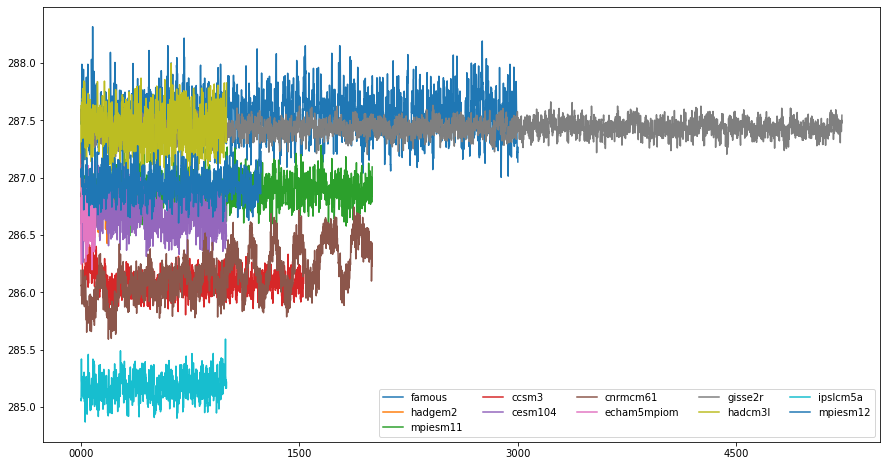

In [78]:
fig, ax = plt.subplots(figsize=(15,8))


time = control_ds_mean['time'].values
for var in list(control_ds_mean.data_vars):
    ax.plot(time, control_ds_mean[var].values, label=var)
    
ax.legend(ncol = 5)

In [79]:
control_ds

<xarray.Dataset>
Dimensions:      (time: 5225, lon: 144, lat: 72)
Coordinates:
  * time         (time) object 0000-12-31 00:00:00 ... 5224-12-31 00:00:00
  * lon          (lon) float64 1.25 3.75 6.25 8.75 ... 351.2 353.8 356.2 358.8
  * lat          (lat) float64 -88.75 -86.25 -83.75 -81.25 ... 83.75 86.25 88.75
    height       float32 1.5
Data variables:
    famous       (time, lat, lon) float32 224.5 224.4 224.4 ... nan nan nan
    hadgem2      (time, lat, lon) float32 226.3 226.3 226.3 ... nan nan nan
    mpiesm11     (time, lat, lon) float32 224.7 224.7 224.6 ... nan nan nan
    ccsm3        (time, lat, lon) float32 234.3 234.0 234.0 ... nan nan nan
    cesm104      (time, lat, lon) float32 227.5 227.4 227.3 ... nan nan nan
    cnrmcm61     (time, lat, lon) float32 224.1 224.1 224.1 ... nan nan nan
    echam5mpiom  (time, lat, lon) float32 228.7 228.4 228.4 ... nan nan nan
    gisse2r      (time, lat, lon) float32 225.4 225.3 225.2 ... 254.9 254.9
    hadcm3l      (time, lat, lon) float64 227.3 227.3 227.5 ... nan nan nan
    ipslcm5a     (time, lat, lon) float32 227.2 227.1 227.0 ... nan nan nan
    mpiesm12     (time, lat, lon) float32 224.4 224.4 224.4 ... nan nan nan
Attributes:
    standard_name:  air_temperature
    units:          K
    cell_methods:   area: mean time: mean

In [80]:
abrupt4x_anom_array = []

for model in models:
    print(f'{model}, ', end='')

    abrupt4x_da = abrupt4x_ds[model]
    control_da = control_ds[model]

    abrupt_anom_da = abrupt4x_da.clima.anomalies(start = control_da.time.dt.year.values[0], 
                                  end = control_da.time.dt.year.values[-1],
                    historical = control_da)

    abrupt4x_anom_array.append(abrupt_anom_da)

famous, Using historical dataset
hadgem2, Using historical dataset
mpiesm11, Using historical dataset
ccsm3, Using historical dataset
cesm104, Using historical dataset
cnrmcm61, Using historical dataset
echam5mpiom, Using historical dataset
gisse2r, Using historical dataset
hadcm3l, Using historical dataset
ipslcm5a, Using historical dataset
mpiesm12, Using historical dataset


In [81]:
abrupt4x_anom = xr.merge(abrupt4x_anom_array)

In [82]:
abrupt4x_anom

<xarray.Dataset>
Dimensions:      (time: 5900, lon: 144, lat: 72)
Coordinates:
  * time         (time) object 0000-12-31 00:00:00 ... 5899-12-31 00:00:00
  * lon          (lon) float64 1.25 3.75 6.25 8.75 ... 351.2 353.8 356.2 358.8
  * lat          (lat) float64 -88.75 -86.25 -83.75 -81.25 ... 83.75 86.25 88.75
    height       float32 1.5
Data variables:
    famous       (time, lat, lon) float32 dask.array<chunksize=(8, 72, 144), meta=np.ndarray>
    hadgem2      (time, lat, lon) float32 dask.array<chunksize=(8, 72, 144), meta=np.ndarray>
    mpiesm11     (time, lat, lon) float32 dask.array<chunksize=(8, 72, 144), meta=np.ndarray>
    ccsm3        (time, lat, lon) float32 dask.array<chunksize=(8, 72, 144), meta=np.ndarray>
    cesm104      (time, lat, lon) float32 dask.array<chunksize=(8, 72, 144), meta=np.ndarray>
    cnrmcm61     (time, lat, lon) float32 dask.array<chunksize=(8, 72, 144), meta=np.ndarray>
    echam5mpiom  (time, lat, lon) float32 dask.array<chunksize=(8, 72, 144), meta=np.ndarray>
    gisse2r      (time, lat, lon) float32 dask.array<chunksize=(8, 72, 144), meta=np.ndarray>
    hadcm3l      (time, lat, lon) float64 dask.array<chunksize=(8, 72, 144), meta=np.ndarray>
    ipslcm5a     (time, lat, lon) float32 dask.array<chunksize=(8, 72, 144), meta=np.ndarray>
    mpiesm12     (time, lat, lon) float32 dask.array<chunksize=(8, 72, 144), meta=np.ndarray>

In [83]:
abrupt4x_mean_array = []

for model in models:
    print(f'{model}, ', end='')

    abrupt4x_da = abrupt4x_anom[model]

    abrupt_mean_da = abrupt4x_da.clima.space_mean()

    abrupt4x_mean_array.append(abrupt_mean_da)
    
abrupt4x_mean = xr.merge(abrupt4x_mean_array)

famous, hadgem2, mpiesm11, ccsm3, cesm104, cnrmcm61, echam5mpiom, gisse2r, hadcm3l, ipslcm5a, mpiesm12, 

In [84]:
abrupt4x_mean = abrupt4x_mean.compute()

In [85]:
abrupt4x_mean

<xarray.Dataset>
Dimensions:      (time: 5900)
Coordinates:
  * time         (time) object 0000-12-31 00:00:00 ... 5899-12-31 00:00:00
    height       float32 1.5
Data variables:
    famous       (time) float64 1.508 2.445 3.113 3.674 ... nan nan nan nan
    hadgem2      (time) float64 1.2 1.819 2.297 2.575 2.858 ... nan nan nan nan
    mpiesm11     (time) float64 0.984 1.628 2.228 2.489 ... nan nan nan nan
    ccsm3        (time) float64 2.277 2.562 2.729 2.639 ... nan nan nan nan
    cesm104      (time) float64 1.181 1.599 1.98 2.198 ... 6.631 6.753 6.895
    cnrmcm61     (time) float64 1.242 1.925 2.524 2.966 ... nan nan nan nan
    echam5mpiom  (time) float64 0.7807 1.878 2.421 2.497 ... nan nan nan nan
    gisse2r      (time) float64 1.2 1.86 2.06 2.172 2.414 ... nan nan nan nan
    hadcm3l      (time) float64 1.69 2.179 2.517 2.854 3.273 ... nan nan nan nan
    ipslcm5a     (time) float64 1.275 1.774 2.037 2.391 ... nan nan nan nan
    mpiesm12     (time) float64 1.361 1.988 2.466 2.726 ... nan nan nan nan

In [86]:
abrupt4x_mean['mean'] = abrupt4x_mean.to_array(dim='models').mean('models')

In [119]:
control_ds_mean['mean'] = control_ds_mean.to_array(dim='models').mean('models')

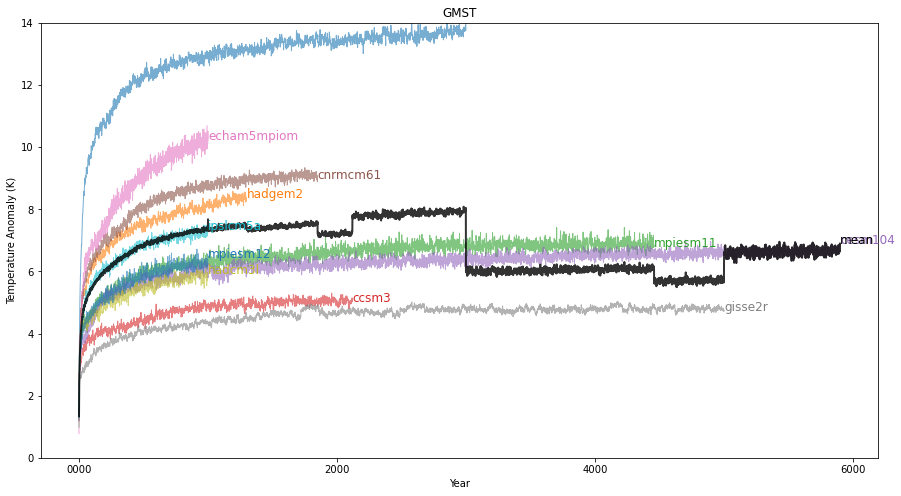

In [295]:
data = abrupt4x_mean.where(abrupt4x_mean.time.dt.year < 13500, drop = True)

fig, ax = plt.subplots(figsize=(15,8))


# time = data['time'].values
for var in list(data.data_vars):
    
    # Removing nans from data
    da = data[var].dropna(dim='time')
    time = da.time.values
    values = da.values
    
    if var == 'mean':
        line_kwargs = dict(alpha = 0.8,
        linewidth = 2,
        c = 'k')
    else:
        line_kwargs = dict(alpha = 0.6,
        linewidth = 1)
    
    
    ax.plot(time, values, label=var, **line_kwargs)
    c = plt.gca().lines[-1].get_color()
    ax.annotate(var, xy = (time[-1], values[-1]), color=c, zorder=1000, size=12)

ax.set_ylabel('Temperature Anomaly (K)')
ax.set_xlabel('Year')
ax.set_title('GMST')
ax.set_ylim([0,14])

fig.savefig(os.path.join(IMG_DIR, 'all_model_mean.png'))

In [202]:
def global_mean_sn(da, control, window = 61):
    #### Control
    # Singal
    control_signal = control.sn.signal_grad(roll_period = window)

    # Noise
    control_loess = control.sn.loess_grid()
    control_noise = control_loess.sn.noise_grad(roll_period = window)

    # Signal to Noise
    control_sn = control_signal/control_noise

    # The upper and lower bounds of what is stable.
    control_smean_ubound = control_sn.max(dim='time') #.reduce(xca.dask_percentile,dim='time', q=99)
    control_smean_lbound = control_sn.min(dim='time') #.reduce(xca.dask_percentile,dim='time', q=1)


    ### Da

    da_signal = da.sn.signal_grad(roll_period = window)
    da_loess = da.sn.loess_grid()
    da_noise = da_loess.sn.noise_grad(roll_period = window)
    da_sn = da_signal/da_noise


    # TEMP
    # The global mean temperature anomalies that are stable
    da_stable = da.where(np.logical_and(da_sn <= control_smean_ubound,da_sn >= control_smean_lbound))
    # Increasing temperature
    da_increasing = da.where(da_sn >= control_smean_ubound )
    # Decreasing temperature.
    da_decreasing = da.where(da_sn <= control_smean_lbound )

    # SN
    # The global mean signal-to-noise points that are stable
    da_sn_stable = da_sn.where(
        np.logical_and(da_sn <= control_smean_ubound,da_sn >= control_smean_lbound ))
    # Increasing temperature S/N
    da_sn_increasing = da_sn.where(da_sn >= control_smean_ubound )
    # Decreasing temperature S/N
    da_sn_decreasing = da_sn.where(da_sn <= control_smean_lbound )
    
    return (da_stable, da_increasing, da_decreasing, 
                da_sn_stable, da_sn_increasing, da_sn_decreasing, 
                control_smean_lbound, control_smean_ubound)
    


In [204]:
(da_mean_stable, da_mean_increasing, da_mean_decreasing, 
                da_mean_sn_stable, da_mean_increasing, da_mean_sn_decreasing, 
                lb, ub) = global_mean_sn(
    abrupt4x_mean['mean'].where(abrupt4x_mean['mean'].time.dt.year < 2000, drop = True), 
    control_ds_mean['mean'].where(control_ds_mean['mean'].time.dt.year < 2000, drop = True)
    ,201)

(-10.0, 22.0)

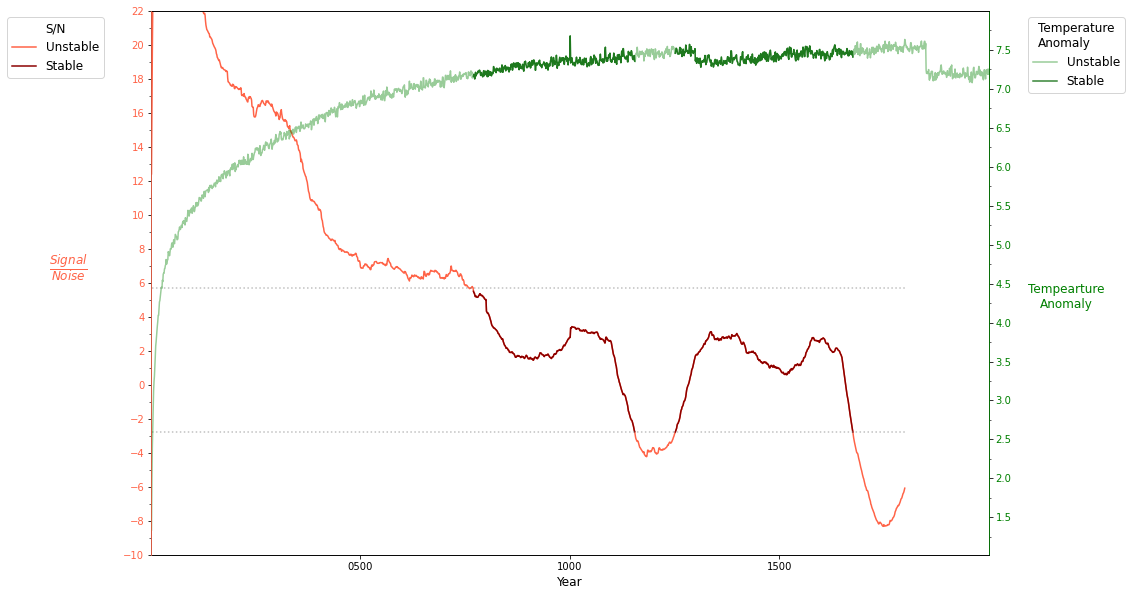

In [205]:
fig = plt.figure(figsize=  (15,10))
ax = fig.add_subplot(111)

sn_plot.temperature_vs_sn_plot(ax,  da_mean_sn, abrupt4x_mean['mean'].where(abrupt4x_mean['mean'].time.dt.year < 2000, drop = True),
                      temp_highlight = da_mean_stable, 
                      sn_highlight = da_mean_sn_stable)

time = da_mean_sn.time.values
ax.plot([time[0], time[-1]], [ub.values, ub.values], linestyle=':', color='grey', alpha=0.5)
ax.plot([time[0], time[-1]], [lb.values, lb.values], linestyle=':', color='grey', alpha=0.5)

ax.set_ylim([-10, 22])

In [224]:

def range_windows_stability(da, control_da, start_window = 21, end_window = 221, step_window = 8):
    decreasing_sn_array = []
    increasing_sn_array = []
    stable_array = []
    sn_array = []
    lower_bound_array = []
    upper_bound_array = []

    windows = range(start_window, end_window,step_window)
    
    # Looping through
    for window in windows:

        print(f'{window}, ', end='')
        
        (da_stable, da_increasing, da_decreasing, 
                da_sn_stable, da_sn_increasing, da_sn_decreasing, 
                control_smean_lbound, control_smean_ubound) =\
                        global_mean_sn(da, control_da, window)



        increasing_sn_array.append(da_sn_increasing)
        decreasing_sn_array.append(da_sn_decreasing)
        stable_array.append(da_sn_stable)
        
    # Mergine the das together to form a an array witht he S/N values and a dim called window
    increasing_sn_ds = xr.concat(increasing_sn_array, pd.Index(windows, name = 'window'))
    decreasing_sn_ds = xr.concat(decreasing_sn_array, pd.Index(windows, name = 'window'))
    
    
    # Loading into memoery. 
    with ProgressBar():
        increasing_sn_ds = increasing_sn_ds.compute()
        
    with ProgressBar():
        decreasing_sn_ds = decreasing_sn_ds.compute()
    

    unstable_sn_da  = increasing_sn_ds.fillna(0) + decreasing_sn_ds.fillna(0)

    unstable_sn_da  = xr.where(unstable_sn_da  != 0, unstable_sn_da , np.nan)
    
    unstable_sn_da['time'] = unstable_sn_da .time.dt.year.values
    unstable_sn_da.name = 'S/N'
    
    
    stable_sn_da  = xr.where(np.isfinite(unstable_sn_da ), 1, 0)
    return unstable_sn_da , stable_sn_da 

In [233]:
unstable_sn_da_mean, stable_sn_da_mean = range_windows_stability(
    abrupt4x_mean['mean'].where(abrupt4x_mean['mean'].time.dt.year < 2000, drop = True), 
    control_ds_mean['mean'].where(control_ds_mean['mean'].time.dt.year < 2000, drop = True)
)

21, 29, 37, 45, 53, 61, 69, 77, 85, 93, 101, 109, 117, 125, 133, 141, 149, 157, 165, 173, 181, 189, 197, 205, 213, 

In [234]:
unstable_sn_da_mean

<xarray.DataArray 'S/N' (window: 25, time: 1980)>
array([[ 4.72956828,  5.46045395,  6.27054126, ...,         nan,
                nan,         nan],
       [ 5.37839514,  6.43163054,  7.62495949, ...,         nan,
                nan,         nan],
       [ 6.10811748,  7.42559665,  8.84514779, ...,         nan,
                nan,         nan],
       ...,
       [12.30914554, 15.95590727, 19.4688805 , ...,         nan,
                nan,         nan],
       [12.52509704, 16.24336726, 19.80519842, ...,         nan,
                nan,         nan],
       [12.77477384, 16.57858135, 20.21845039, ...,         nan,
                nan,         nan]])
Coordinates:
  * time     (time) int64 0 1 2 3 4 5 6 7 ... 1973 1974 1975 1976 1977 1978 1979
    height   float32 1.5
  * window   (window) int64 21 29 37 45 53 61 69 ... 165 173 181 189 197 205 213

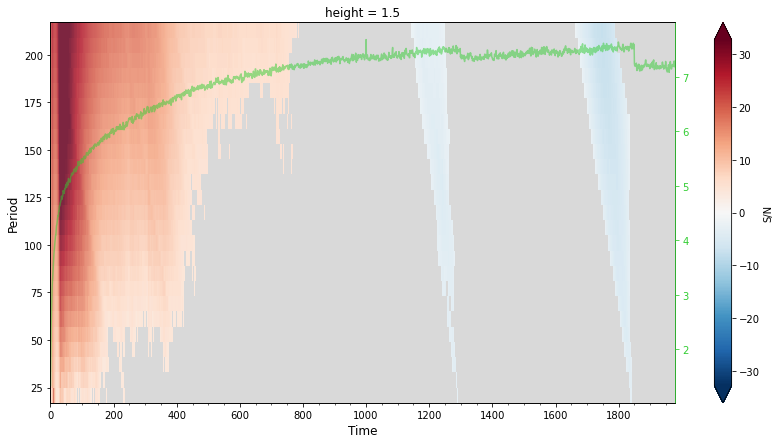

In [296]:
fig = plt.figure(figsize=(14,7))

ax = fig.add_subplot(111)
unstable_sn_da_mean.plot(ax=ax,cmap='RdBu_r', robust=True, extend='both')
stable_sn_da_mean.plot(ax=ax,cmap='gist_gray', robust=True, extend='both',
                     alpha = 0.15, add_colorbar = False)

ax.set_ylabel('Period', size = 12)

ax2 = ax.twinx()
ax2.plot(abrupt4x_mean['mean'].where(abrupt4x_mean['mean'].time.dt.year < 2000, drop = True).time.dt.year.values, 
         abrupt4x_mean['mean'].where(abrupt4x_mean['mean'].time.dt.year < 2000, drop = True), color='limegreen',
         alpha= 0.5)

c1 = plt.gca().lines[-1].get_color()
ax2.spines['right'].set_color(c1)
ax2.tick_params(axis='y', colors=c1)


ax.set_xlabel('Time', size =12)
ax.xaxis.set_major_locator(mticker.MultipleLocator(200))
ax.xaxis.set_minor_locator(mticker.MultipleLocator(50))

fig.savefig(os.path.join(IMG_DIR, 'all_model_SM_multi_window.png'))

In [277]:
xr.where(np.isfinite(stable_sn_da), 1, 0)

<xarray.DataArray 'S/N' (window: 25, time: 980)>
array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])
Coordinates:
  * time     (time) int64 0 1 2 3 4 5 6 7 8 ... 972 973 974 975 976 977 978 979
    height   float32 1.5
  * window   (window) int64 21 29 37 45 53 61 69 ... 165 173 181 189 197 205 213

In [278]:
stable_frac_da

<xarray.DataArray 'number_models_stable' (window: 25, time: 1980)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * time     (time) int64 0 1 2 3 4 5 6 7 ... 1973 1974 1975 1976 1977 1978 1979
    height   float32 1.5
  * window   (window) int64 21 29 37 45 53 61 69 ... 165 173 181 189 197 205 213

In [286]:
# stable_frac_da = xr.zeros_like(unstable_sn_da_mean)
# stable_frac_da.name = 'number_models_stable'

# unstable_frac_da = xr.zeros_like(unstable_sn_da_mean)
# unstable_frac_da.name = 'number_models_unstable'

stable_frac_array = []
unstable_frac_array = []

models = []

for model in list(abrupt4x_mean.data_vars):
    if model != 'mean' and model != 'echam5mpiom':
        print('\n')
        print(model)
        models.append(model)
        unstable_sn_da , stable_sn_da  = range_windows_stability(
        abrupt4x_mean[model].where(abrupt4x_mean[model].time.dt.year < 1000, drop = True).dropna(dim='time'), 
        control_ds_mean[model].where(control_ds_mean[model].time.dt.year < 1000, drop = True).dropna(dim='time'), )

        
        stable_frac_array.append(xr.where(np.isfinite(stable_sn_da), 1, 0))
        unstable_frac_array.append(xr.where(np.isfinite(unstable_sn_da), 1, 0))



famous
21, 29, 37, 45, 53, 61, 69, 77, 85, 93, 101, 109, 117, 125, 133, 141, 149, 157, 165, 173, 181, 189, 197, 205, 213, 

hadgem2
21, 29, 37, 45, 53, 61, 69, 77, 85, 93, 101, 109, 117, 125, 133, 141, 149, 157, 165, 173, 181, 189, 197, 205, 213, 

mpiesm11
21, 29, 37, 45, 53, 61, 69, 77, 85, 93, 101, 109, 117, 125, 133, 141, 149, 157, 165, 173, 181, 189, 197, 205, 213, 

ccsm3
21, 29, 37, 45, 53, 61, 69, 77, 85, 93, 101, 109, 117, 125, 133, 141, 149, 157, 165, 173, 181, 189, 197, 205, 213, 

cesm104
21, 29, 37, 45, 53, 61, 69, 77, 85, 93, 101, 109, 117, 125, 133, 141, 149, 157, 165, 173, 181, 189, 197, 205, 213, 

cnrmcm61
21, 29, 37, 45, 53, 61, 69, 77, 85, 93, 101, 109, 117, 125, 133, 141, 149, 157, 165, 173, 181, 189, 197, 205, 213, 

gisse2r
21, 29, 37, 45, 53, 61, 69, 77, 85, 93, 101, 109, 117, 125, 133, 141, 149, 157, 165, 173, 181, 189, 197, 205, 213, 

hadcm3l
21, 29, 37, 45, 53, 61, 69, 77, 85, 93, 101, 109, 117, 125, 133, 141, 149, 157, 165, 173, 181, 189, 197, 205, 213, 


In [287]:
stable_frac_da = xr.concat(stable_frac_array, pd.Index(models, name='model')).sum(dim='model') *100/len(models)
stable_frac_da.name = 'percent_of_models'
unstable_frac_da = xr.concat(unstable_frac_array, pd.Index(models, name='model')).sum(dim='model') * 100/len(models)
unstable_frac_da.name = 'percent_of_models'

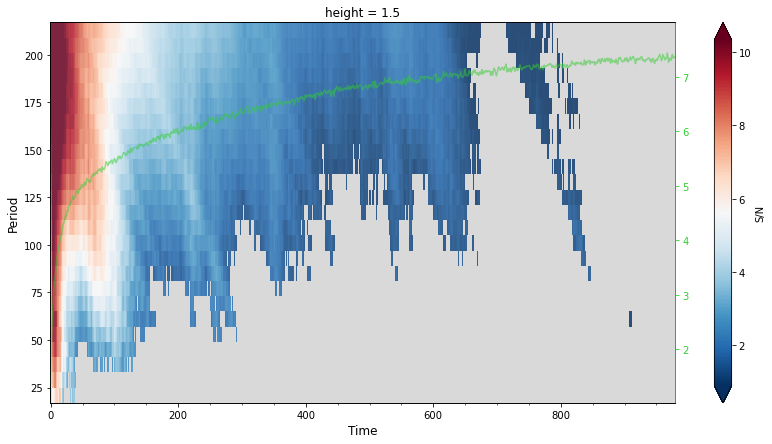

In [288]:
fig = plt.figure(figsize=(14,7))

ax = fig.add_subplot(111)
unstable_sn_da.plot(ax=ax,cmap='RdBu_r', robust=True, extend='both')
stable_sn_da.plot(ax=ax,cmap='gist_gray', robust=True, extend='both',
                     alpha = 0.15, add_colorbar = False)

ax.set_ylabel('Period', size = 12)

ax2 = ax.twinx()
ax2.plot(abrupt4x_mean['mean'].where(abrupt4x_mean['mean'].time.dt.year < 2000, drop = True).time.dt.year.values, 
         abrupt4x_mean['mean'].where(abrupt4x_mean['mean'].time.dt.year < 2000, drop = True), color='limegreen',
         alpha= 0.5)

c1 = plt.gca().lines[-1].get_color()
ax2.spines['right'].set_color(c1)
ax2.tick_params(axis='y', colors=c1)


ax.set_xlabel('Time', size =12)
ax.xaxis.set_major_locator(mticker.MultipleLocator(200))
ax.xaxis.set_minor_locator(mticker.MultipleLocator(50))

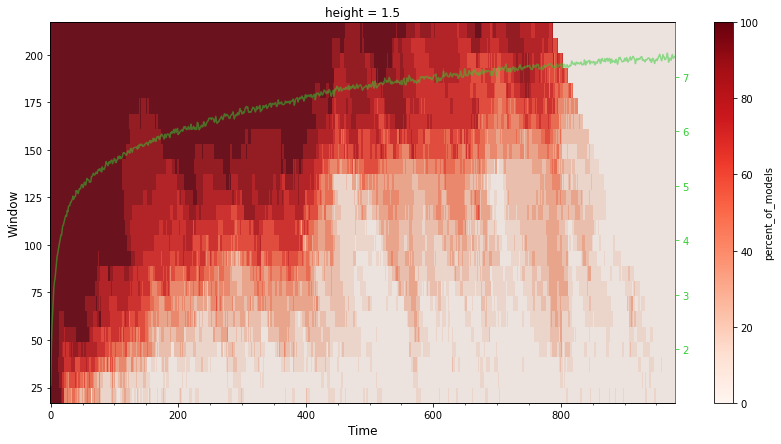

In [298]:
fig = plt.figure(figsize=(14,7))

ax = fig.add_subplot(111)
unstable_frac_da.plot(ax=ax,cmap='Reds')
stable_frac_da.plot(ax=ax,cmap='gist_gray',
                     alpha = 0.15, add_colorbar = False)

ax.set_ylabel('Window', size = 12)

ax2 = ax.twinx()
ax2.plot(abrupt4x_mean['mean'].where(abrupt4x_mean['mean'].time.dt.year < 2000, drop = True).time.dt.year.values, 
         abrupt4x_mean['mean'].where(abrupt4x_mean['mean'].time.dt.year < 2000, drop = True), color='limegreen',
         alpha= 0.5)

c1 = plt.gca().lines[-1].get_color()
ax2.spines['right'].set_color(c1)
ax2.tick_params(axis='y', colors=c1)


ax.set_xlabel('Time', size =12)
ax.xaxis.set_major_locator(mticker.MultipleLocator(200))
ax.xaxis.set_minor_locator(mticker.MultipleLocator(50))

fig.savefig(os.path.join(IMG_DIR, 'all_model_frac_window.png'))